In [1]:
import pandas as pd
import numpy as np


In [2]:
#Movielens dataset - 100k ratings
!curl -o ml-latest-small.zip http://files.grouplens.org/datasets/movielens/ml-latest-small.zip
# backup location
#!curl -o ml-latest-small.zip http://www.dcs.gla.ac.uk/~craigm/recsysHM/ml-latest-small.zip

!unzip -o ml-latest-small.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  955k  100  955k    0     0  2400k      0 --:--:-- --:--:-- --:--:-- 2394k
Archive:  ml-latest-small.zip
   creating: ml-latest-small/
  inflating: ml-latest-small/links.csv  
  inflating: ml-latest-small/tags.csv  
  inflating: ml-latest-small/ratings.csv  
  inflating: ml-latest-small/README.txt  
  inflating: ml-latest-small/movies.csv  


In [3]:
ratings_df = pd.read_csv("ml-latest-small/ratings.csv")
movies_df = pd.read_csv("ml-latest-small/movies.csv")

# we're going to treat userId as strings, and similarly as movies
ratings_df['userId'] = "u" + ratings_df['userId'].astype(str)
ratings_df['movieId'] = "m" + ratings_df['movieId'].astype(str)
movies_df['movieId'] = "m" +  movies_df['movieId'].astype(str)

In [4]:
ratings_df

,userId,movieId,rating,timestamp
0,u1,m1,4.0,964982703
1,u1,m3,4.0,964981247
2,u1,m6,4.0,964982224
3,u1,m47,5.0,964983815
4,u1,m50,5.0,964982931
...,...,...,...,...
100831,u610,m166534,4.0,1493848402
100832,u610,m168248,5.0,1493850091
100833,u610,m168250,5.0,1494273047
100834,u610,m168252,5.0,1493846352


In [5]:
movies_df

,movieId,title,genres
0,m1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,m2,Jumanji (1995),Adventure|Children|Fantasy
2,m3,Grumpier Old Men (1995),Comedy|Romance
3,m4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,m5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,m193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,m193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,m193585,Flint (2017),Drama
9740,m193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [6]:
len(ratings_df["userId"].unique()) #total 610 users in the dataset

610

In [7]:
#Each user uses different rating scales #one user's rate the movie he liked as 5 while the other rate as 4
#so its important to find the user's mean rating to understand user's range of rating scales
ratings_df.groupby(["userId"]).mean("rating")

,rating,timestamp
userId,,
u1,4.366379,9.649856e+08
u10,3.278571,1.455351e+09
u100,3.945946,1.100186e+09
u101,3.557377,9.684412e+08
u102,3.357143,8.360463e+08
...,...,...
u95,4.062500,1.063984e+09
u96,3.884615,9.647732e+08
u97,4.194444,1.044293e+09


In [8]:
ratings_df.groupby(["userId"]).mean()["rating"].loc["u200"]#mean rating of user u200

3.809880239520958

In [9]:
ratings_df.groupby(["userId"])['rating'].count()
 #average number of ratings per user

userId
u1      232
u10     140
u100    148
u101     61
u102     56
       ... 
u95     168
u96      78
u97      36
u98      92
u99      53
Name: rating, Length: 610, dtype: int64

In [10]:
#analysing user's preferences
pd.merge(
    ratings_df[ratings_df["userId"]=='u556'], 
    movies_df, 
    on=["movieId"]).sort_values(by="rating", ascending=False)
    #u556 seems like they are into advebtyre/action/fantasies

,userId,movieId,rating,timestamp,title,genres
0,u556,m588,5.0,1534321062,Aladdin (1992),Adventure|Animation|Children|Comedy|Musical
2,u556,m4896,5.0,1534320962,Harry Potter and the Sorcerer's Stone (a.k.a. ...,Adventure|Children|Fantasy
27,u556,m112852,5.0,1534321287,Guardians of the Galaxy (2014),Action|Adventure|Sci-Fi
21,u556,m76093,5.0,1534320965,How to Train Your Dragon (2010),Adventure|Animation|Children|Fantasy|IMAX
3,u556,m4993,4.5,1534320935,"Lord of the Rings: The Fellowship of the Ring,...",Adventure|Fantasy
4,u556,m5816,4.5,1534320982,Harry Potter and the Chamber of Secrets (2002),Adventure|Fantasy
23,u556,m88125,4.5,1534320986,Harry Potter and the Deathly Hallows: Part 2 (...,Action|Adventure|Drama|Fantasy|Mystery|IMAX
13,u556,m49649,4.5,1534321075,Eragon (2006),Action|Adventure|Fantasy
18,u556,m72998,4.0,1534321171,Avatar (2009),Action|Adventure|Sci-Fi|IMAX
30,u556,m162600,4.0,1534321200,Miss Peregrine's Home for Peculiar Children (2...,Fantasy


In [11]:
#Analysing movie categories
#First performing the merge of two dataframe
new_df=ratings_df.merge(movies_df[['movieId','title','genres']],on='movieId',how='right')

In [12]:
new_df.head()

,userId,movieId,rating,timestamp,title,genres
0,u1,m1,4.0,9.649827e+08,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,u5,m1,4.0,8.474350e+08,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,u7,m1,4.5,1.106636e+09,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,u15,m1,2.5,1.510578e+09,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,u17,m1,4.5,1.305696e+09,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [13]:
#u556 & Fantasy & >= 4.0
u556_fantasy_r4=new_df.loc[(new_df['genres'].str.contains('Fantasy',regex=True)) & (new_df['rating'] >= 4.0) & (new_df['userId']=='u556')]
u556_fantasy_r4.count()

userId       22
movieId      22
rating       22
timestamp    22
title        22
genres       22
dtype: int64

In [17]:
u556_all=new_df.loc[(new_df['userId']=='u556')]
len(u556_all)

32

In [16]:
#u556's total positive ratings
u556_r4=new_df.loc[(new_df['rating'] >= 4.0) & (new_df['userId']=='u7')]
u556_r4.count() #70 positive reviews
percentage= (u556_fantasy_r4.count() / len(u556_all)) * 100
percentage # 68.75 % is positive

userId       68.75
movieId      68.75
rating       68.75
timestamp    68.75
title        68.75
genres       68.75
dtype: float64

**Popularity based Recommendation**

In [18]:
groupingCountSeries = ratings_df[["movieId", "rating"]].groupby(["movieId"]).count()
groupingCountSeries[groupingCountSeries.rating<25]

,rating
movieId,
m100,14
m100044,1
m100068,1
m100083,3
m100106,1
...,...
m99853,1
m999,12
m99910,2


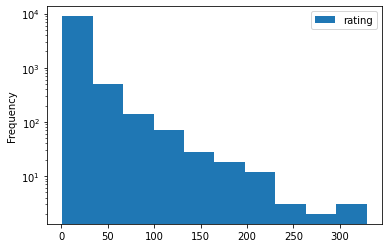

In [19]:
#Frequency Distribution of movie ratings 
plot=groupingCountSeries.plot.hist(bins=10,log=True)

plot.figure.savefig('k.png')

In [20]:
#Finding all the movies with the highest ratings
#titles=pd.merge(pairswithcounts,movies_df, on=["userId"])
#df2 = pairswithcounts.merge(right=movies_df, left_on='movieId_x')
movie_groups=ratings_df[["movieId","rating"]].groupby(["movieId"])
movie_groups_ratings=movie_groups.agg(meanRating=('rating',np.mean))
movie_groups_ratings['number_of_ratings']=movie_groups.count()

movie_popular_ratings=movie_groups_ratings[movie_groups_ratings.meanRating==movie_groups_ratings['meanRating'].max()]
movie_popular_ratings_display=pd.merge(movie_popular_ratings,movies_df[['title','movieId']],on=['movieId'],left_index=True).sort_values(['meanRating'],ascending=False)

In [21]:
movie_popular_ratings_display[movie_popular_ratings_display.meanRating==5.0].count()

movieId              296
meanRating           296
number_of_ratings    296
title                296
dtype: int64

In [22]:
len(movie_popular_ratings_display)

296

In [23]:
movie_popular_ratings_display

,movieId,meanRating,number_of_ratings,title
8107,m100556,5.0,1,"Act of Killing, The (2012)"
432,m495,5.0,1,In the Realm of the Senses (Ai no corrida) (1976)
3504,m4788,5.0,1,Moscow Does Not Believe in Tears (Moskva sleza...
6283,m47736,5.0,1,"Chump at Oxford, A (1940)"
405,m467,5.0,1,Live Nude Girls (1995)
...,...,...,...,...
9299,m158882,5.0,1,All Yours (2016)
9289,m158398,5.0,1,World of Glory (1991)
9284,m158027,5.0,1,SORI: Voice from the Heart (2016)
9281,m157775,5.0,1,Tenchi Muyô! In Love (1996)


In [24]:
positives = ratings_df[ratings_df["rating"]>=4]

#join positives with itself on userId to get all pairs of movies watched by a given user.
pairs = pd.merge(positives, positives, on=["userId"])

#we only want A->B, not B->A. Use the timestamps to restrict the selected pairs
sequences = pairs[pairs["timestamp_x"] < pairs["timestamp_y"]] 

#lets count the frequency of each pair of movies.
paircounts = sequences[["movieId_x", "movieId_y", "userId"]].groupby(["movieId_x", "movieId_y"]).count()

#sort by the most popular pairs.
pairswithcounts = paircounts.reset_index().rename(columns={"userId" : "count"}).sort_values(['count'], ascending=False)

#display the top most frequent pairs
pairswithcounts.head()

,movieId_x,movieId_y,count
1574483,m318,m356,104
1416644,m296,m593,92
1416033,m296,m47,91
1187221,m260,m1196,91
1575263,m318,m527,90


In [25]:
#The titles of the most popular movie pairs from pairswithcounts
titles=pairswithcounts.merge(movies_df,how='left',left_on='movieId_x',right_on='movieId')
titles=titles.rename(columns={"title":"title_x","genres":"genres_x"})
titles=titles.drop(columns=['movieId'])
titles.sort_values('count')
titles

,movieId_x,movieId_y,count,title_x,genres_x
0,m318,m356,104,"Shawshank Redemption, The (1994)",Crime|Drama
1,m296,m593,92,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
2,m296,m47,91,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
3,m260,m1196,91,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi
4,m318,m527,90,"Shawshank Redemption, The (1994)",Crime|Drama
...,...,...,...,...,...
3533031,m288,m302,1,Natural Born Killers (1994),Action|Crime|Thriller
3533032,m288,m3020,1,Natural Born Killers (1994),Action|Crime|Thriller
3533033,m288,m3030,1,Natural Born Killers (1994),Action|Crime|Thriller
3533034,m288,m3033,1,Natural Born Killers (1994),Action|Crime|Thriller


In [27]:
titles=titles.merge(movies_df,how='left',left_on='movieId_y',right_on='movieId')
titles=titles.rename(columns={"title":"title_y","genres":"genres_y"})
titles=titles.drop(columns=['movieId'])
titles.sort_values('count')
titles.head(5)

,movieId_x,movieId_y,count,title_x,genres_x,title_y,genres_y,title_y,genres_y
0,m318,m356,104,"Shawshank Redemption, The (1994)",Crime|Drama,Forrest Gump (1994),Comedy|Drama|Romance|War,Forrest Gump (1994),Comedy|Drama|Romance|War
1,m296,m593,92,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller
2,m296,m47,91,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
3,m260,m1196,91,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,Star Wars: Episode V - The Empire Strikes Back...,Action|Adventure|Sci-Fi,Star Wars: Episode V - The Empire Strikes Back...,Action|Adventure|Sci-Fi
4,m318,m527,90,"Shawshank Redemption, The (1994)",Crime|Drama,Schindler's List (1993),Drama|War,Schindler's List (1993),Drama|War


In [29]:
popular_ratings=movie_popular_ratings_display[['movieId','title','number_of_ratings']]

In [30]:
#Calculating life with all pairs in pairwithcounts
count_x=pd.merge(titles,popular_ratings,left_on=['movieId_x'],right_on=['movieId'])
count_x.rename(columns={'number_of_ratings' : 'ratingCount_x'},inplace=True)

count_xy=pd.merge(count_x,popular_ratings,left_on=['movieId_y'],right_on=['movieId'])
count_xy.rename(columns={'number_of_ratings' : 'ratingCount_y'},inplace=True)
count_xy

,movieId_x,movieId_y,count,title_x,genres_x,title_y,genres_y,title_y,genres_y,movieId_x,title_x,ratingCount_x,movieId_y,title_y,ratingCount_y
0,m6818,m140627,1,Come and See (Idi i smotri) (1985),Drama|War,Battle For Sevastopol (2015),Drama|Romance|War,Battle For Sevastopol (2015),Drama|Romance|War,m6818,Come and See (Idi i smotri) (1985),2,m140627,Battle For Sevastopol (2015),1
1,m64499,m140627,1,Che: Part One (2008),Drama|War,Battle For Sevastopol (2015),Drama|Romance|War,Battle For Sevastopol (2015),Drama|Romance|War,m64499,Che: Part One (2008),1,m140627,Battle For Sevastopol (2015),1
2,m64501,m140627,1,Che: Part Two (2008),Drama|War,Battle For Sevastopol (2015),Drama|Romance|War,Battle For Sevastopol (2015),Drama|Romance|War,m64501,Che: Part Two (2008),1,m140627,Battle For Sevastopol (2015),1
3,m158027,m140627,1,SORI: Voice from the Heart (2016),Drama|Sci-Fi,Battle For Sevastopol (2015),Drama|Romance|War,Battle For Sevastopol (2015),Drama|Romance|War,m158027,SORI: Voice from the Heart (2016),1,m140627,Battle For Sevastopol (2015),1
4,m3473,m1310,1,Jonah Who Will Be 25 in the Year 2000 (Jonas q...,Comedy,Hype! (1996),Documentary,Hype! (1996),Documentary,m3473,Jonah Who Will Be 25 in the Year 2000 (Jonas q...,2,m1310,Hype! (1996),1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4389,m3942,m3940,1,Sorority House Massacre II (1990),Horror,Slumber Party Massacre III (1990),Horror,Slumber Party Massacre III (1990),Horror,m3942,Sorority House Massacre II (1990),1,m3940,Slumber Party Massacre III (1990),1
4390,m3678,m633,1,"Man with the Golden Arm, The (1955)",Drama,Denise Calls Up (1995),Comedy,Denise Calls Up (1995),Comedy,m3678,"Man with the Golden Arm, The (1955)",1,m633,Denise Calls Up (1995),1
4391,m26350,m31522,1,"Passenger, The (Professione: reporter) (1975)",Drama,"Marriage of Maria Braun, The (Ehe der Maria Br...",Drama,"Marriage of Maria Braun, The (Ehe der Maria Br...",Drama,m26350,"Passenger, The (Professione: reporter) (1975)",1,m31522,"Marriage of Maria Braun, The (Ehe der Maria Br...",1
4392,m26401,m100906,1,Last Hurrah for Chivalry (Hao xia) (1979),Action|Drama,Maniac Cop 2 (1990),Action|Horror|Thriller,Maniac Cop 2 (1990),Action|Horror|Thriller,m26401,Last Hurrah for Chivalry (Hao xia) (1979),1,m100906,Maniac Cop 2 (1990),1


In [31]:
count_xy['lift']=(count_xy['count']/len(ratings_df))/((count_xy['ratingCount_x']/len(ratings_df)) * (count_xy['ratingCount_y']/len(ratings_df)))

In [32]:
count_xy.sort_values(by=['lift'],ascending=False)

,movieId_x,movieId_y,count,title_x,genres_x,title_y,genres_y,title_y,genres_y,movieId_x,title_x,ratingCount_x,movieId_y,title_y,ratingCount_y,lift
2197,m121781,m139640,1,Stuart Little 3: Call of the Wild (2005),Animation|Children|Comedy|Fantasy,Ooops! Noah is Gone... (2015),Animation,Ooops! Noah is Gone... (2015),Animation,m121781,Stuart Little 3: Call of the Wild (2005),1,m139640,Ooops! Noah is Gone... (2015),1,100836.0
2915,m147330,m140265,1,Sherlock Holmes and Dr. Watson: Acquaintance (...,Crime,George Carlin: Jammin' in New York (1992),Comedy,George Carlin: Jammin' in New York (1992),Comedy,m147330,Sherlock Holmes and Dr. Watson: Acquaintance (...,1,m140265,George Carlin: Jammin' in New York (1992),1,100836.0
2921,m130978,m140265,1,Love and Pigeons (1985),Comedy|Romance,George Carlin: Jammin' in New York (1992),Comedy,George Carlin: Jammin' in New York (1992),Comedy,m130978,Love and Pigeons (1985),1,m140265,George Carlin: Jammin' in New York (1992),1,100836.0
2920,m131237,m140265,1,What Men Talk About (2010),Comedy,George Carlin: Jammin' in New York (1992),Comedy,George Carlin: Jammin' in New York (1992),Comedy,m131237,What Men Talk About (2010),1,m140265,George Carlin: Jammin' in New York (1992),1,100836.0
2919,m109633,m140265,1,"Garden of Words, The (Koto no ha no niwa) (2013)",Animation|Romance,George Carlin: Jammin' in New York (1992),Comedy,George Carlin: Jammin' in New York (1992),Comedy,m109633,"Garden of Words, The (Koto no ha no niwa) (2013)",1,m140265,George Carlin: Jammin' in New York (1992),1,100836.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4334,m7071,m78836,1,"Woman Under the Influence, A (1974)",Drama,Enter the Void (2009),Drama,Enter the Void (2009),Drama,m7071,"Woman Under the Influence, A (1974)",1,m78836,Enter the Void (2009),2,50418.0
0,m6818,m140627,1,Come and See (Idi i smotri) (1985),Drama|War,Battle For Sevastopol (2015),Drama|Romance|War,Battle For Sevastopol (2015),Drama|Romance|War,m6818,Come and See (Idi i smotri) (1985),2,m140627,Battle For Sevastopol (2015),1,50418.0
10,m3473,m99,1,Jonah Who Will Be 25 in the Year 2000 (Jonas q...,Comedy,Heidi Fleiss: Hollywood Madam (1995),Documentary,Heidi Fleiss: Hollywood Madam (1995),Documentary,m3473,Jonah Who Will Be 25 in the Year 2000 (Jonas q...,2,m99,Heidi Fleiss: Hollywood Madam (1995),2,25209.0
33,m3473,m53,1,Jonah Who Will Be 25 in the Year 2000 (Jonas q...,Comedy,Lamerica (1994),Adventure|Drama,Lamerica (1994),Adventure|Drama,m3473,Jonah Who Will Be 25 in the Year 2000 (Jonas q...,2,m53,Lamerica (1994),2,25209.0


In [33]:
count_xy= count_xy.loc[:,~count_xy.columns.duplicated()] #to remove duplictes

In [35]:
count_xy.tail() #why all count is one? #need to do some changes in this

,movieId_x,movieId_y,count,title_x,genres_x,title_y,genres_y,ratingCount_x,ratingCount_y,lift
4389,m3942,m3940,1,Sorority House Massacre II (1990),Horror,Slumber Party Massacre III (1990),Horror,1,1,100836.0
4390,m3678,m633,1,"Man with the Golden Arm, The (1955)",Drama,Denise Calls Up (1995),Comedy,1,1,100836.0
4391,m26350,m31522,1,"Passenger, The (Professione: reporter) (1975)",Drama,"Marriage of Maria Braun, The (Ehe der Maria Br...",Drama,1,1,100836.0
4392,m26401,m100906,1,Last Hurrah for Chivalry (Hao xia) (1979),Action|Drama,Maniac Cop 2 (1990),Action|Horror|Thriller,1,1,100836.0
4393,m25906,m93008,1,Mr. Skeffington (1944),Drama|Romance,"Very Potter Sequel, A (2010)",Comedy|Musical,1,1,100836.0
